In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import numpy.linalg as la
import csv
import pandas as pd

In [2]:
db = pd.read_csv("model_data.csv")
for row in db:
    if row == 'TPA' or row == 'Patient' or row == 'date of op' or row == 'survival' or row == 'GX VO2 Max VO2/Pred (%)' or row == 'GX Predicted VO2/HR (mL/beat)' or row == 'GX Predicted Work (Watts)' or row == 'name of op' or row == 'pred mort' or row == 'date of discharge ' or row == 'LOSbin' or row == 'date of death/Today' or row == 'alive / dead' or row == 'survival' or row == '30/7mort' or row == '1 year mort ' or row == '2 year mort ':
        db = db.drop(row,axis = 1, inplace= False)

In [3]:
db['Sex'] = db['Sex'].replace('M',1)
db['Sex'] = db['Sex'].replace('F',0)

In [4]:
db['Side'] = db['Side'].replace('L',0)
db['Side'] = db['Side'].replace('R',1)
db = db.dropna(axis = 0)
db

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/HR (mL/beat),GX Work Max Work (Watts),PF Pre FEV1/FVC (%),PF Pre FEV1 (L),Side,LOS
0,88,1,24,10.2,35,12.5,8,47,69.0,2.06,0.0,2
1,84,1,20,9.0,30,15.4,6,67,72.0,2.01,0.0,6
2,83,1,23,8.8,39,15.4,10,60,68.0,2.15,0.0,18
3,88,1,29,10.5,38,14.0,11,74,77.0,2.45,1.0,13
4,86,0,25,12.7,38,15.7,7,70,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
245,72,1,29,13.8,28,21.5,16,131,73.0,3.05,0.0,4
246,59,1,31,11.3,20,27.3,15,186,67.0,2.64,0.0,15
247,66,1,32,11.9,24,21.6,14,179,76.0,3.42,0.0,3
248,79,0,31,10.5,23,13.9,9,73,58.0,1.01,0.0,7


In [5]:
X = np.array(db)

In [6]:
X

array([[88.  ,  1.  , 24.  , ...,  2.06,  0.  ,  2.  ],
       [84.  ,  1.  , 20.  , ...,  2.01,  0.  ,  6.  ],
       [83.  ,  1.  , 23.  , ...,  2.15,  0.  , 18.  ],
       ...,
       [66.  ,  1.  , 32.  , ...,  3.42,  0.  ,  3.  ],
       [79.  ,  0.  , 31.  , ...,  1.01,  0.  ,  7.  ],
       [81.  ,  0.  , 30.  , ...,  1.39,  0.  , 11.  ]])

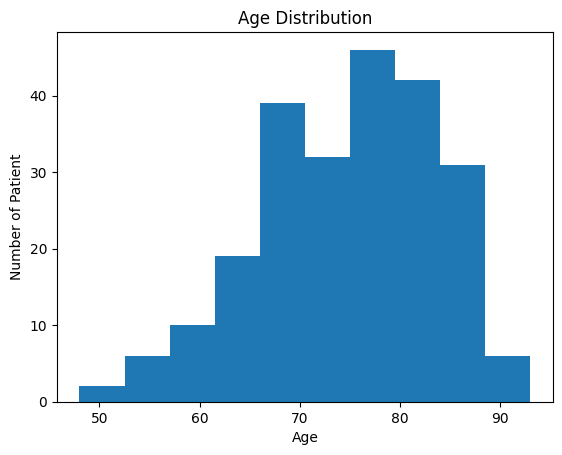

In [7]:
#Age Distribution Display
X_1 = X[:,0]
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patient")
plt.hist(X_1);

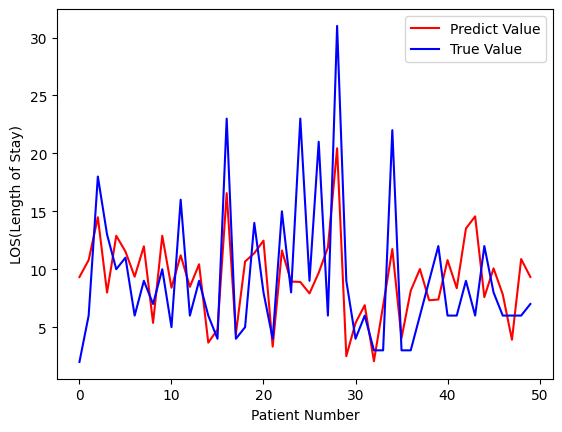

In [22]:
#Normal Equation
#top 20% of the data
X_2 = X[:50,:11]
y_2 = X[:50,11]


#add 1 to each row cause we need a x = 1 for multivariate x = (1,x1,x2....xn)
#theta = (theta0,theta1,......thetan)
X2 = np.insert(X_2,0,1,axis = 1)
#calculate theta
#normal equation
theta = np.dot(np.dot(X2.T,y_2), la.inv(np.dot(X2.T,X2)))
#get intercept * coef
intercept = theta[0]
coef = theta[1:]

pred = []
for i in X_2:
    test_x = i.reshape(1,-1)
    test_x = np.hstack([np.ones((len(test_x),1)),test_x])
    result = test_x.dot(theta)
    pred.append(result)

y_hat = pred

plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_2,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

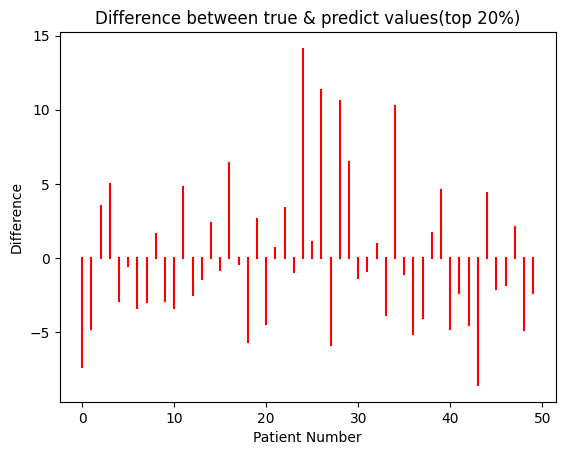

In [23]:
x = np.arange(50)
for i in x:
    plt.plot((i,i),(0,(y_2[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(top 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference");

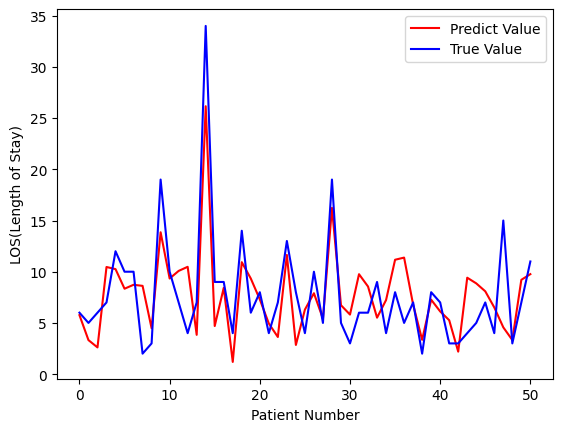

In [24]:
#Normal Equation
#bottom 20% of the data
X_3 = X[182:233,:11]
y_3 = X[182:233,11]


#add 1 to each row cause we need a x = 1 for multivariate x = (1,x1,x2....xn)
#theta = (theta0,theta1,......thetan)
X3 = np.insert(X_3,0,1,axis = 1)
#calculate theta
#normal equation
theta = np.dot(np.dot(X3.T,y_3), la.inv(np.dot(X3.T,X3)))
#get intercept * coef
intercept = theta[0]
coef = theta[1:]

pred1 = []
for i in X_3:
    test_x = i.reshape(1,-1)
    test_x = np.hstack([np.ones((len(test_x),1)),test_x])
    result = test_x.dot(theta)
    pred1.append(result)
    
y_hat1 = pred1

plt.plot(y_hat1,'r',label='Predict Value')
plt.plot(y_3,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

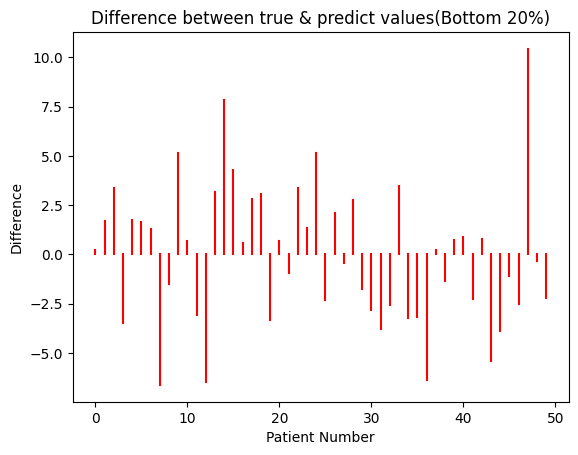

In [25]:
for i in x:
    plt.plot((i,i),(0,(y_3[i]-y_hat1[i])), 'r-')

plt.title("Difference between true & predict values(Bottom 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference");

In [14]:
#Gradient Descent
def loss_fn(y,y_hat):
    return np.sum((y-y_hat)**2)

def grad_theta(x, y, theta):
    """returns gradient of loss wrt theta"""
    return 2*np.dot(x.T,np.dot(x,theta)) - 2*np.dot(x.T,y)

def update_theta(x, y, theta, gamma):
    """updates theta by theta = theta_old - gamma*dL/dtheta"""
    # implement here
    theta = theta - gamma*grad_theta(x,y,theta)
    return theta

def hyp(theta):
    """make a hypothesis function that works with more than one feature"""
    def mxc(x):
        return np.dot(theta, x.T)
    return mxc

def fit_poly(X, y, gamma):
    count=0
    # make guess at theta
    next_theta = np.random.randn(X.shape[1])
    losses = []
    loss = np.inf
    while loss>0.1:
        theta = next_theta
        guess = hyp(theta)
        y_hat = guess(X).reshape(-1)
        loss = np.sum((y-y_hat)**2)
        losses.append(loss)
        next_theta = update_theta(X, y, theta, gamma)
        count+=1
        if count >10000:
            break
            
    return theta, count, losses

[-0.69669169  0.0619936  -0.27123961 -0.0859412   0.13598731  0.15344588
 -0.34973839  0.2655121   0.07181403 -0.00485936 -1.35652715  1.42443138]


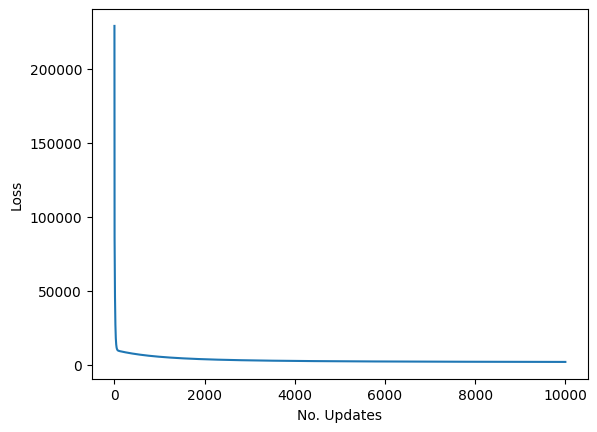

In [31]:
#Gradient Descent for top20%
#data is X2,y_2
gamma = 0.0000005
theta, count, losses = fit_poly(X2,y_2,gamma)
print(theta)
plt.xlabel("No. Updates")
plt.ylabel("Loss")
plt.plot(np.arange(len(losses)), losses);

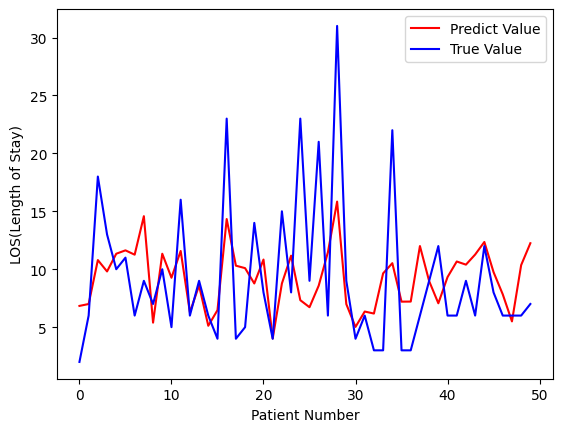

In [18]:
guess = hyp(theta)
y_hat = guess(X2)
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_2,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

Text(0, 0.5, 'Difference')

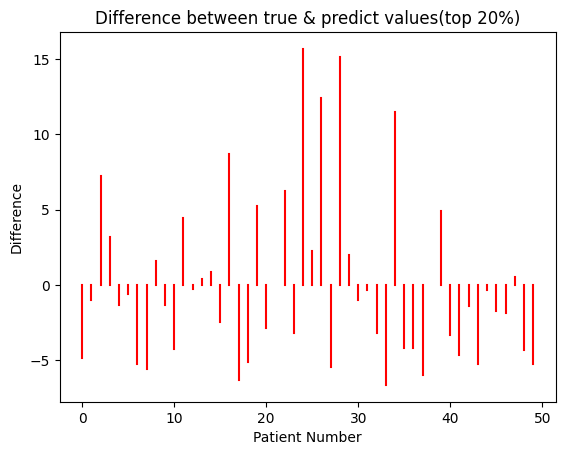

In [21]:
for i in x:
    plt.plot((i,i),(0,(y_2[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(top 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")

[ 0.03188656 -0.14905469  0.00673562  0.66992545 -0.13507152  0.06422296
  0.56773477  0.16929085 -0.1125512   0.02278591 -1.29558019 -1.53709445]


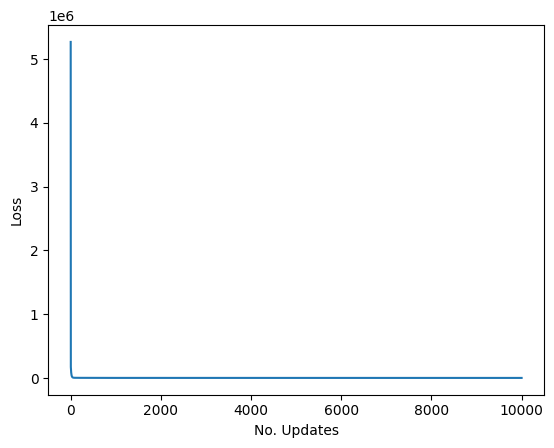

In [26]:
#Gradient Descent for bot20%
#data is X3,y_3
gamma = 0.0000005
theta, count, losses = fit_poly(X3,y_3,gamma)
print(theta)
plt.xlabel("No. Updates")
plt.ylabel("Loss")
plt.plot(np.arange(len(losses)), losses);

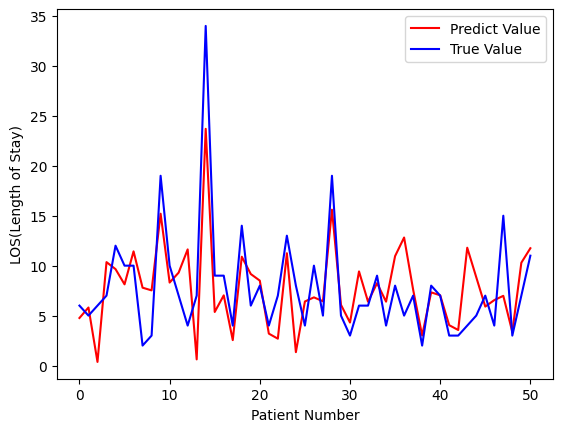

In [27]:
guess = hyp(theta)
y_hat = guess(X3)
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_3,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

Text(0, 0.5, 'Difference')

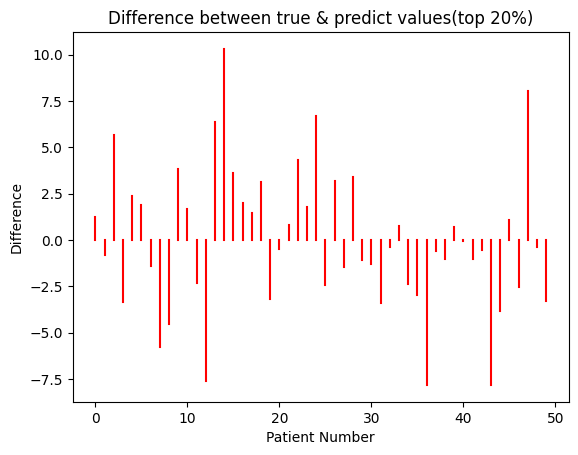

In [29]:
for i in x:
    plt.plot((i,i),(0,(y_3[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(top 20%)")
plt.xlabel("Patient Number")
plt.ylabel("Difference")

In [32]:
X_4 = X[:,:11]

In [33]:
y_4 = X[:,11]

In [34]:
X_4

array([[88.  ,  1.  , 24.  , ..., 69.  ,  2.06,  0.  ],
       [84.  ,  1.  , 20.  , ..., 72.  ,  2.01,  0.  ],
       [83.  ,  1.  , 23.  , ..., 68.  ,  2.15,  0.  ],
       ...,
       [66.  ,  1.  , 32.  , ..., 76.  ,  3.42,  0.  ],
       [79.  ,  0.  , 31.  , ..., 58.  ,  1.01,  0.  ],
       [81.  ,  0.  , 30.  , ..., 68.  ,  1.39,  0.  ]])

In [35]:
y_4

array([ 2.,  6., 18., 13., 10., 11.,  6.,  9.,  7., 10.,  5., 16.,  6.,
        9.,  6.,  4., 23.,  4.,  5., 14.,  8.,  4., 15.,  8., 23.,  9.,
       21.,  6., 31.,  9.,  4.,  6.,  3.,  3., 22.,  3.,  3.,  6.,  9.,
       12.,  6.,  6.,  9.,  6., 12.,  8.,  6.,  6.,  6.,  7.,  9.,  5.,
       19.,  4., 12., 44., 12.,  5.,  3.,  4.,  4.,  4., 36.,  3.,  6.,
       18.,  5.,  6., 13.,  6., 10.,  5.,  7.,  4.,  6.,  5., 12.,  4.,
        5.,  7.,  7.,  8., 14.,  3., 11.,  6.,  5., 10.,  8., 14., 41.,
       13.,  8.,  3., 12.,  5., 27.,  3., 11.,  2.,  5., 12.,  4.,  7.,
        8.,  9., 18.,  8.,  7.,  9.,  8., 12.,  9.,  6.,  3., 14., 12.,
        3., 93.,  2.,  6.,  8.,  6., 12., 20.,  4.,  7., 30., 24.,  8.,
        2.,  8.,  7.,  3.,  8., 10., 38.,  5.,  5.,  2.,  8.,  6.,  8.,
       22.,  3., 13.,  4.,  5.,  4.,  6.,  5.,  9.,  7.,  3.,  8.,  7.,
       13.,  4.,  6.,  3.,  9.,  4.,  8.,  6.,  7.,  6.,  4.,  7., 16.,
        8.,  7., 14., 15.,  9.,  9., 13.,  6.,  7.,  7.,  6., 11

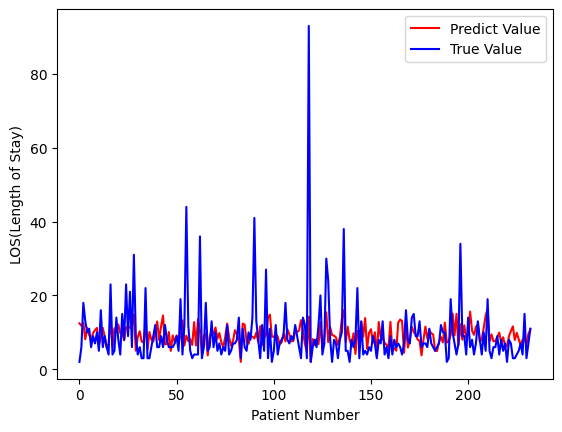

In [36]:
#add 1 to each row cause we need a x = 1 for multivariate x = (1,x1,x2....xn)
#theta = (theta0,theta1,......thetan)
X4 = np.insert(X_4,0,1,axis = 1)
#calculate theta
#normal equation
theta = np.dot(np.dot(X4.T,y_4), la.inv(np.dot(X4.T,X4)))
#get intercept * coef
intercept = theta[0]
coef = theta[1:]

pred = []
for i in X_4:
    test_x = i.reshape(1,-1)
    test_x = np.hstack([np.ones((len(test_x),1)),test_x])
    result = test_x.dot(theta)
    pred.append(result)

y_hat = pred

plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_4,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

In [38]:
X.shape

(233, 12)

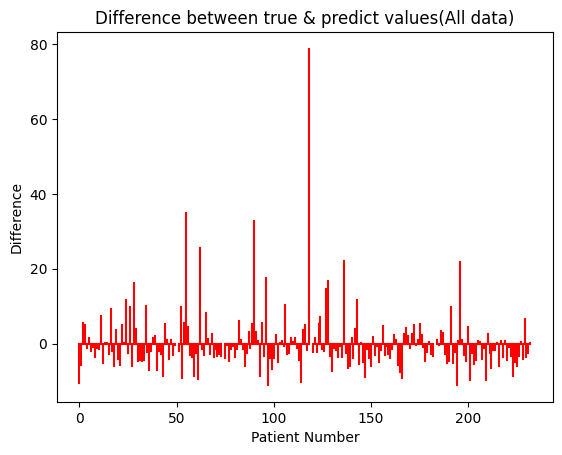

In [41]:
x = np.arange(233)
for i in x:
    plt.plot((i,i),(0,(y_4[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(All data)")
plt.xlabel("Patient Number")
plt.ylabel("Difference");

[-0.95204244  0.08257685  0.23613523  0.07965891  0.32843235  0.07192274
 -0.35688847  0.45744146 -0.01817782 -0.04510406  0.41464267 -0.445265  ]


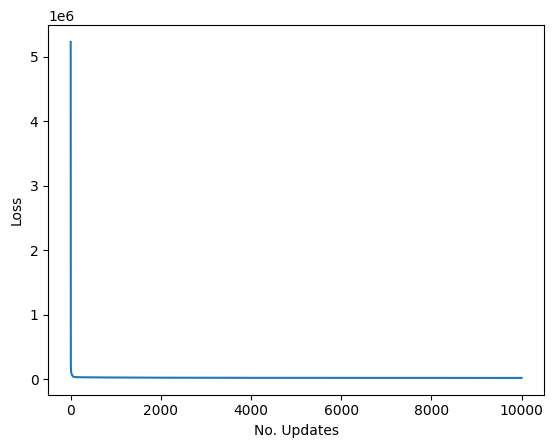

In [47]:
gamma = 0.00000005
theta, count, losses = fit_poly(X4,y_4,gamma)
print(theta)
plt.xlabel("No. Updates")
plt.ylabel("Loss")
plt.plot(np.arange(len(losses)), losses);

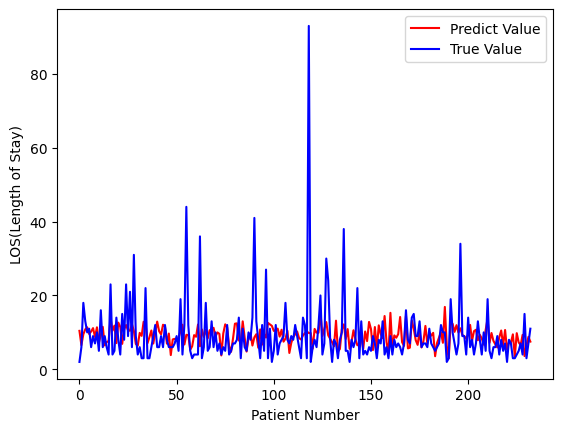

In [48]:
guess = hyp(theta)
y_hat = guess(X4)
plt.plot(y_hat,'r',label='Predict Value')
plt.plot(y_4,'b',label='True Value');
plt.xlabel("Patient Number")
plt.ylabel("LOS(Length of Stay)")
plt.legend()
plt.show()

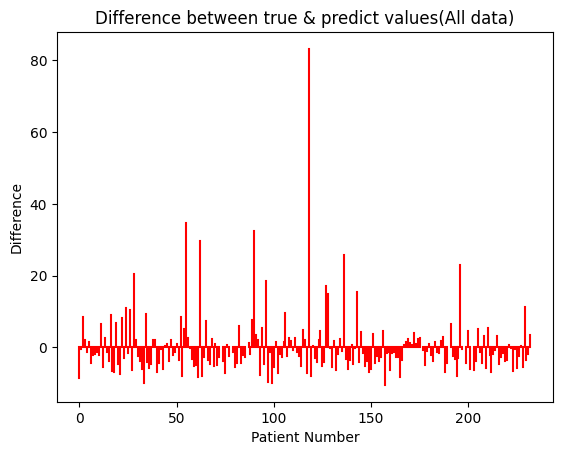

In [49]:
x = np.arange(233)
for i in x:
    plt.plot((i,i),(0,(y_4[i]-y_hat[i])), 'r-')

plt.title("Difference between true & predict values(All data)")
plt.xlabel("Patient Number")
plt.ylabel("Difference");